In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic['sex']= np.where(titanic['sex']=='male',1,0)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic['alive']= np.where(titanic['alive']=='yes',1,0)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,0,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,1,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,0,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,1,True


In [5]:
xdata = titanic.iloc[:,[2,6]]
ydata = titanic.iloc[:,[-2]]

In [6]:
# 정규화 과정이 필요하다
from sklearn import preprocessing

feature_scale = preprocessing.MinMaxScaler()
xdataN = feature_scale.fit_transform(xdata)

label_scale = preprocessing.MinMaxScaler()
ydataN = label_scale.fit_transform(ydata)

In [7]:
x = tf.placeholder(tf.float32,shape=[None,2])
y = tf.constant( ydata, tf.float32)
w = tf.Variable( tf.random_uniform([2,1])) #기울기를 랜덤하게 준다
b = tf.Variable(tf.random_uniform([1]))

In [8]:
z = tf.matmul(x,w) +b
hx = tf.nn.sigmoid(z)
cost = tf.reduce_mean ( tf.square(hx-y) )

In [9]:
z = tf.matmul(x,w) +b
hx = tf.nn.sigmoid(z)
cost = tf.reduce_mean ( tf.square(hx-y) )

optimizer = tf.train.AdamOptimizer(0.1) #Learning rate
train = optimizer.minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range( 1000):
    sess.run( train, {x:xdata})
    print( i, sess.run(cost, {x:xdata}))

0 0.57015824
1 0.5231175
2 0.4368449
3 0.29359493
4 0.31490305
5 0.34295636
6 0.35483405
7 0.36137554
8 0.3653309
9 0.36782324
10 0.36940688
11 0.3703806
12 0.37091178
13 0.37109357
14 0.37097237
15 0.37056124
16 0.3698445
17 0.36877513
18 0.36726573
19 0.3651662
20 0.36221913
21 0.35795996
22 0.3514721
23 0.34066686
24 0.31923473
25 0.23730864
26 0.23155464
27 0.28970265
28 0.31691796
29 0.32234868
30 0.3116602
31 0.28814784
32 0.25392395
33 0.21293253
34 0.18256146
35 0.24686001
36 0.21312888
37 0.1834449
38 0.19286135
39 0.20456353
40 0.21189867
41 0.21378367
42 0.21077392
43 0.20430376
44 0.19636019
45 0.18913537
46 0.18595159
47 0.19224139
48 0.19920292
49 0.19349197
50 0.18555325
51 0.18487471
52 0.1873825
53 0.18948361
54 0.18989436
55 0.18832661
56 0.18511435
57 0.18130383
58 0.17922379
59 0.18092461
60 0.18233733
61 0.17930831
62 0.17589194
63 0.17557992
64 0.17645045
65 0.17622001
66 0.17430599
67 0.17182112
68 0.1709958
69 0.17173675
70 0.1710064
71 0.16886462
72 0.16792114


566 0.16099335
567 0.16099335
568 0.16099335
569 0.16099335
570 0.16099335
571 0.16099335
572 0.16099335
573 0.16099335
574 0.16099335
575 0.16099335
576 0.16099335
577 0.16099335
578 0.16099335
579 0.16099335
580 0.16099335
581 0.16099335
582 0.16099335
583 0.16099335
584 0.16099335
585 0.16099335
586 0.16099335
587 0.16099335
588 0.16099335
589 0.16099335
590 0.16099335
591 0.16099335
592 0.16099335
593 0.16099335
594 0.16099335
595 0.16099335
596 0.16099335
597 0.16099335
598 0.16099335
599 0.16099335
600 0.16099335
601 0.16099335
602 0.16099335
603 0.16099335
604 0.16099335
605 0.16099335
606 0.16099335
607 0.16099335
608 0.16099335
609 0.16099335
610 0.16099335
611 0.16099335
612 0.16099338
613 0.16099335
614 0.16099335
615 0.16099335
616 0.1609934
617 0.16099335
618 0.16099335
619 0.16099335
620 0.16099335
621 0.16099335
622 0.16099335
623 0.16099338
624 0.16099334
625 0.16099335
626 0.16099338
627 0.16099335
628 0.16099334
629 0.1609934
630 0.16099335
631 0.1609934
632 0.1609934

In [10]:
sess.run(w)

array([[-2.3752437 ],
       [ 0.01279461]], dtype=float32)

In [11]:
sess.run(b)

array([0.6470965], dtype=float32)

In [12]:
result = sess.run(hx, {x:[[1,53]]})
result

array([[0.2592188]], dtype=float32)

In [13]:
predict = tf.cast(hx>0.5, dtype=tf.float32) 
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict,y), dtype=tf.float32)) #equal(predict,y) = e

In [15]:
sess.run(predict, {x:xdata})

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [16]:
sess.run(accuracy,{x:xdata} )

0.7811448

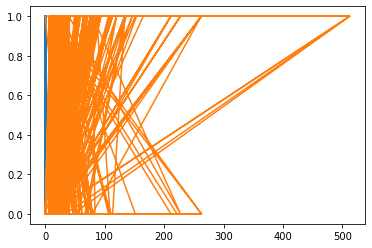

In [14]:
plt.plot(xdata,ydata)